Fake News Detection Using NLP
Project Overview
In this project, we will build a machine learning model to detect fake news using Natural Language Processing (NLP). The dataset consists of two separate files:

fake.csv → Contains fake news articles.

true.csv → Contains real news articles.

Our goal is to train a model on fake news while including a small sample of real news to improve generalization. Later, we will evaluate the model on real news to check its performance.

 Project Steps
1️- Load and Explore the Data

Read both CSV files.

Check for missing values and data structure.

2️- Preprocessing & Labeling

Add a label column (1 for fake, 0 for real).

Combine fake news with this real sample.

3️- Text Processing

Convert text into numerical features using TF-IDF.

Clean and normalize text (remove stopwords, punctuation, etc.).

4️- Train the Model

Split data into training & testing sets.

Train several Machine Learning models like RF,LR,SVM, and NB  to compare the performance and choosethe best for optimization.

5️ Evaluate the Models

Measure accuracy, precision, recall, and F1-score.

Test the model on the real news dataset (the true one ).

6️ Optimize Performance (if needed)

Try hyperparameter tuning.

Experiment with Transformer Models if necessary.

7️ Save & Deploy

Save the final model.

Upload the project to GitHub.



In [2]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

In [4]:
# Load the datasets
fake_df = fake_news = pd.read_csv("fake.csv")
real_df = real_news = pd.read_csv("true.csv")

# Display basic information about the datasets
print("Fake News Dataset:")
print(fake_df.info(), "\n")

print("Real News Dataset:")
print(real_df.info())

# Show the first few rows of each dataset
fake_df.head(), real_df.head()


Fake News Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None 

Real News Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


(                                               title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  ,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U

In [6]:
fake_df.shape

(23481, 4)

In [8]:
real_df.shape

(21417, 4)

## Dataset Overview & Initial Observations  

### Fake News Dataset  
- Contains **23,481** entries with **4 columns**: `title`, `text`, `subject`, and `date`.  
- No missing values in any column.  
- All columns are of type **object (string)**.  
- The `text` column contains the main article content.  
- The `subject` column might provide useful categorization.  
- The `date` column is in string format and might need conversion if used.

### Real News Dataset  
- Contains **21,417** entries with the same **4 columns**.  
- No missing values in any column.  
- Similar structure to the fake news dataset.  
- The `subject` column seems to have different categories compared to fake news.  

### Key Takeaways  
- The dataset sizes are relatively balanced but not exactly equal.  
- The `subject` column may help in additional feature extraction.  
- `title` and `text` will be our main focus for classification.  
- The `date` column is likely not useful for our task, but we will analyze it further if needed.  

## Next Step: Preprocessing & Labeling  
Now, we will proceed with the **preprocessing and labeling phase**:  
1. **Add a new column** to label fake news as `1` and real news as `0`.  
2. **Merge both datasets** into a single dataframe.


In [11]:
# Label the datasets
fake_news["label"] = 1
real_news["label"] = 0

# Merge both datasets
df = pd.concat([fake_news, real_news], axis=0).reset_index(drop=True)

# Display dataset info after merging
df.info()

# Display first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [13]:
df.shape

(44898, 5)

Text Preprocessing
Now that we have merged and labeled the dataset, we will proceed with text preprocessing to clean and prepare the text data for model training. The key steps include:

1-Converting text to lowercase – Ensures uniformity and avoids duplicate words due to case differences.

2-Removing punctuation and special characters – Eliminates unnecessary symbols that don't contribute to meaning.

3-Tokenizing the text – Splits sentences into individual words.

4-Removing stopwords – Filters out common words (e.g., "the", "is", "and") that don't add value.

5-Applying stemming or lemmatization – Reduces words to their root form to standardize variations.

In [16]:
# Convert text to lowercase
df["text"] = df["text"].str.lower()
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"on friday, it was revealed that former milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"on christmas day, donald trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",1


In [18]:
# Remove punctuation from text
df["text"] = df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that h...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",1


In [20]:
# Remove numbers from text
df["text"] = df["text"].apply(lambda x: re.sub(r'\d+', '', x))
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that h...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",1


In [22]:
# Load stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from text
df["text"] = df["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,"December 25, 2017",1


In [24]:
# Tokenize the text column
df["text"] = df["text"].apply(word_tokenize)
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,"[donald, trump, wish, americans, happy, new, y...",News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,"[house, intelligence, committee, chairman, dev...",News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"[friday, revealed, former, milwaukee, sheriff,...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"[christmas, day, donald, trump, announced, wou...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,"[pope, francis, used, annual, christmas, day, ...",News,"December 25, 2017",1


In [26]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each word in the text column
df["text"] = df["text"].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,"[donald, trump, wish, american, happy, new, ye...",News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,"[house, intelligence, committee, chairman, dev...",News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"[friday, revealed, former, milwaukee, sheriff,...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"[christmas, day, donald, trump, announced, wou...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,"[pope, francis, used, annual, christmas, day, ...",News,"December 25, 2017",1


In [28]:
#lets drop the data colums since it is not that useful 
df.drop(columns=["date"], inplace=True)

## Feature Extraction
Now that we have cleaned and preprocessed the text, we need to convert it into a numerical representation for model training. We will use the following techniques:

1. **TF-IDF (Term Frequency-Inverse Document Frequency)** – Assigns importance to words based on their frequency in a document relative to the entire dataset.
2. **Count Vectorization** – Converts text into a matrix of token counts.
3. **Word Embeddings (Optional)** – Represents words as dense numerical vectors (e.g., Word2Vec, GloVe, FastText).

We will start with TF-IDF to transform our text data into features.


In [31]:
# Ensure text column is in string format
df["text"] = df["text"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for efficiency

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df["text"])

# Convert to DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows
X_tfidf_df.head()


,abandon,abandoned,abbas,abc,abdullah,abe,abedin,ability,able,aboard,...,youth,youtube,ypg,zealand,zero,zika,zimbabwe,zinke,zone,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting the Data into Training and Testing Sets

Before training our machine learning models, we need to split the dataset into training and testing sets. This helps evaluate model performance on unseen data. 

We will use **80% of the data for training** and **20% for testing** to ensure the model learns patterns effectively while also being tested on new data.

In [34]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# Display the size of each set
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 35918
Testing set size: 8980


## Model Training and Evaluation

In this step, we will train multiple machine learning models on our preprocessed dataset. The models we will use are:

- **Random Forest (RF)**
- **Logistic Regression (LR)**
- **Naive Bayes (NB)**
- **Support Vector Machine (SVM)**

### Evaluation Metrics:
After training the models, we will evaluate their performance using the following metrics:

- **Accuracy**: Measures the overall correctness of the model.
- **Precision**: Measures how many of the predicted positive cases were actually positive.
- **Recall**: Measures how many actual positive cases were correctly identified.
- **F1 Score**: The harmonic mean of precision and recall, balancing both metrics.

### Visualization:
We will use:
1. **Confusion Matrix**: To analyze the classification errors.
2. **Bar Chart**: To compare Accuracy, Precision, Recall, and F1 Score across all models.

Our goal is to determine the best-performing model for our text classification task.


Training Random Forest...
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4247
           1       1.00      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Training Logistic Regression...
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4247
           1       0.99      0.99      0.99      4733

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Training Naive Bayes...
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      4247
           1       0.97      0.94    

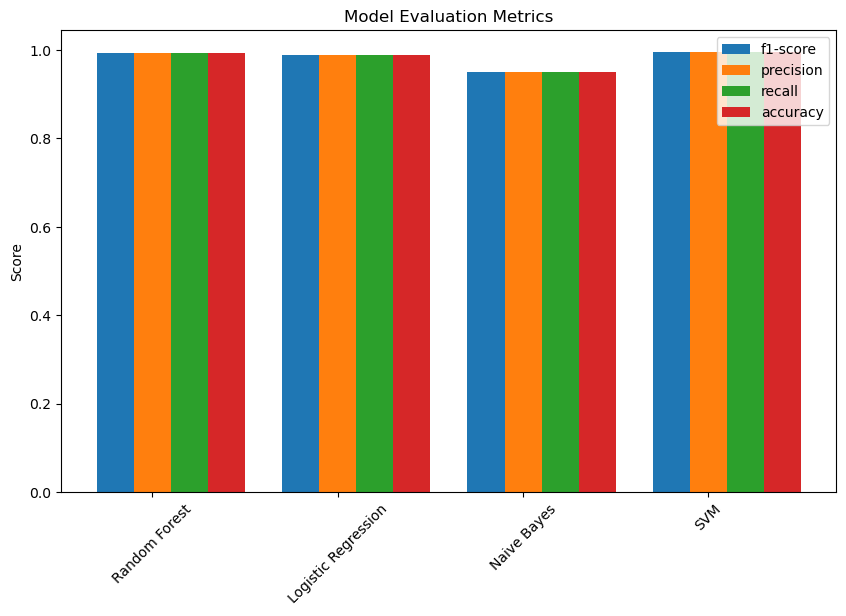

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Apply TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Define models with parallel processing
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1),  
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
}

# Train models and evaluate performance
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

# Visualization - F1 Score, Accuracy, Precision, Recall
metrics = ["f1-score", "precision", "recall", "accuracy"]
scores = {metric: [] for metric in metrics}
model_names = []

for name, report in results.items():
    model_names.append(name)
    scores["accuracy"].append(report["accuracy"])
    scores["f1-score"].append(report["weighted avg"]["f1-score"])
    scores["precision"].append(report["weighted avg"]["precision"])
    scores["recall"].append(report["weighted avg"]["recall"])

# Plot results
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(model_names))
width = 0.2

for i, metric in enumerate(metrics):
    ax.bar(x + i * width, scores[metric], width, label=metric)

ax.set_xticks(x + width)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()
ax.set_title("Model Evaluation Metrics")
ax.set_ylabel("Score")

plt.show()


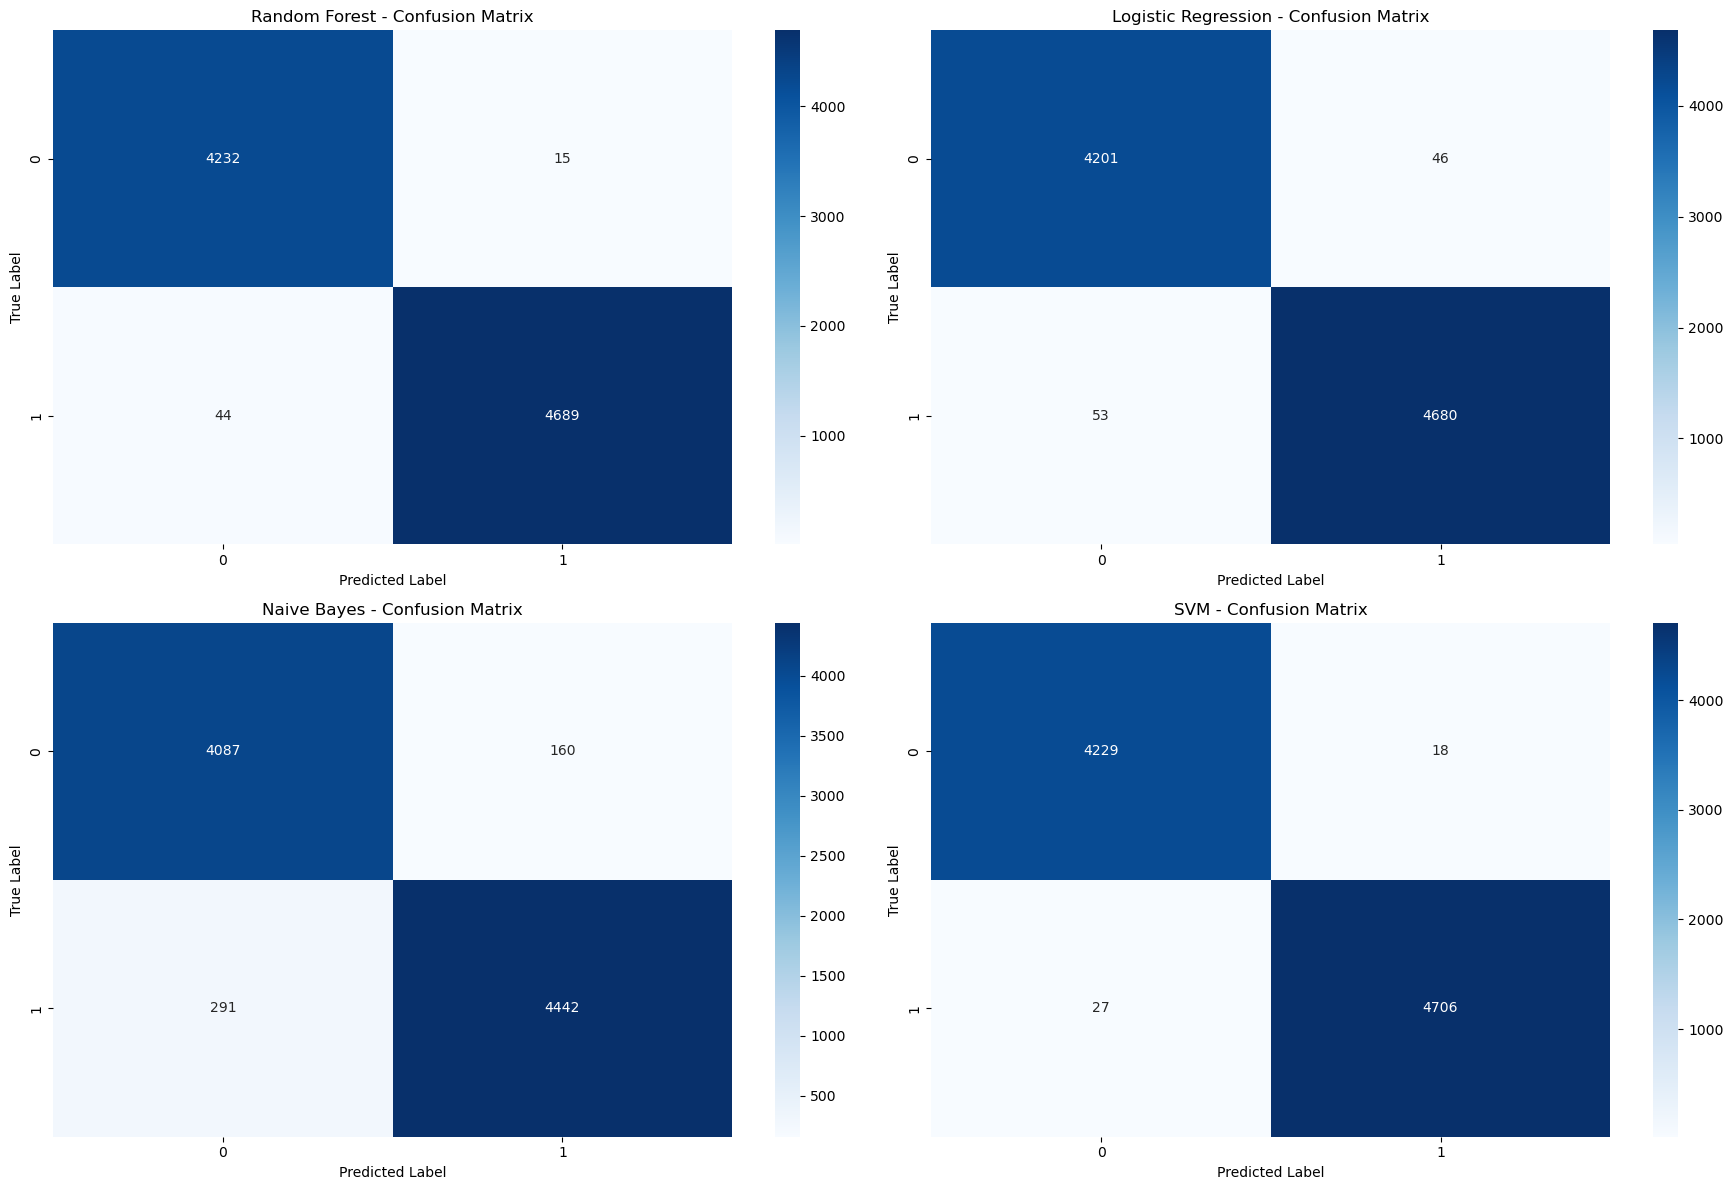

In [39]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplot_mosaic(
    [
        ["model1", "model2"],  # Upper row (2 models)
        ["model3", "model4"],  # Lower row (2 models stretched)
    ],
    figsize=(18, 12)
)

model_names = list(models.keys())

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[f"model{i+1}"])
    axes[f"model{i+1}"].set_title(f"{name} - Confusion Matrix")
    axes[f"model{i+1}"].set_xlabel("Predicted Label")
    axes[f"model{i+1}"].set_ylabel("True Label")

plt.tight_layout()
plt.show()
